# =====================================================
# EMPLOYEE ATTRITION PREDICTION - Mohammed AlDiri
# =====================================================

In [17]:
#Importing the needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
#Load and Preview Data
df = pd.read_csv('EmployeeAttrition.csv')

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [19]:
#Quick Checks And Analysis to decide
print(df['Attrition'].value_counts())
print("\n",df['Gender'].value_counts())
print("\n",df['Over18'].value_counts())
print("\n",df['OverTime'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64

 Gender
Male      882
Female    588
Name: count, dtype: int64

 Over18
Y    1470
Name: count, dtype: int64

 OverTime
No     1054
Yes     416
Name: count, dtype: int64


In [20]:
# We are going to convert Attrition, Gender. Over18 And OverTime into binary values
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,1,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,0,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,0,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,0,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,0,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [21]:
#Now we shall encode the multi values columns which are BusinessTravel, Department, EducationField, JobRole And MartialStatus
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix="Department")).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix="EducationField")).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix="MaritalStatus")).drop('MaritalStatus', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix="JobRole")).drop('JobRole', axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,49,0,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,37,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False
3,33,0,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,27,0,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,0,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1466,39,0,613,6,1,1,2062,4,0,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1467,27,0,155,4,3,1,2064,2,0,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1468,49,0,1023,2,3,1,2065,4,0,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [22]:
#Convertion for the boolean values to binary values for the whole dataset
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
#Check
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,0,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1466,39,0,613,6,1,1,2062,4,0,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1467,27,0,155,4,3,1,2064,2,0,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1468,49,0,1023,2,3,1,2065,4,0,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [23]:
#Drop the obvious non needed columns
df = df.drop('EmployeeNumber', axis=1)

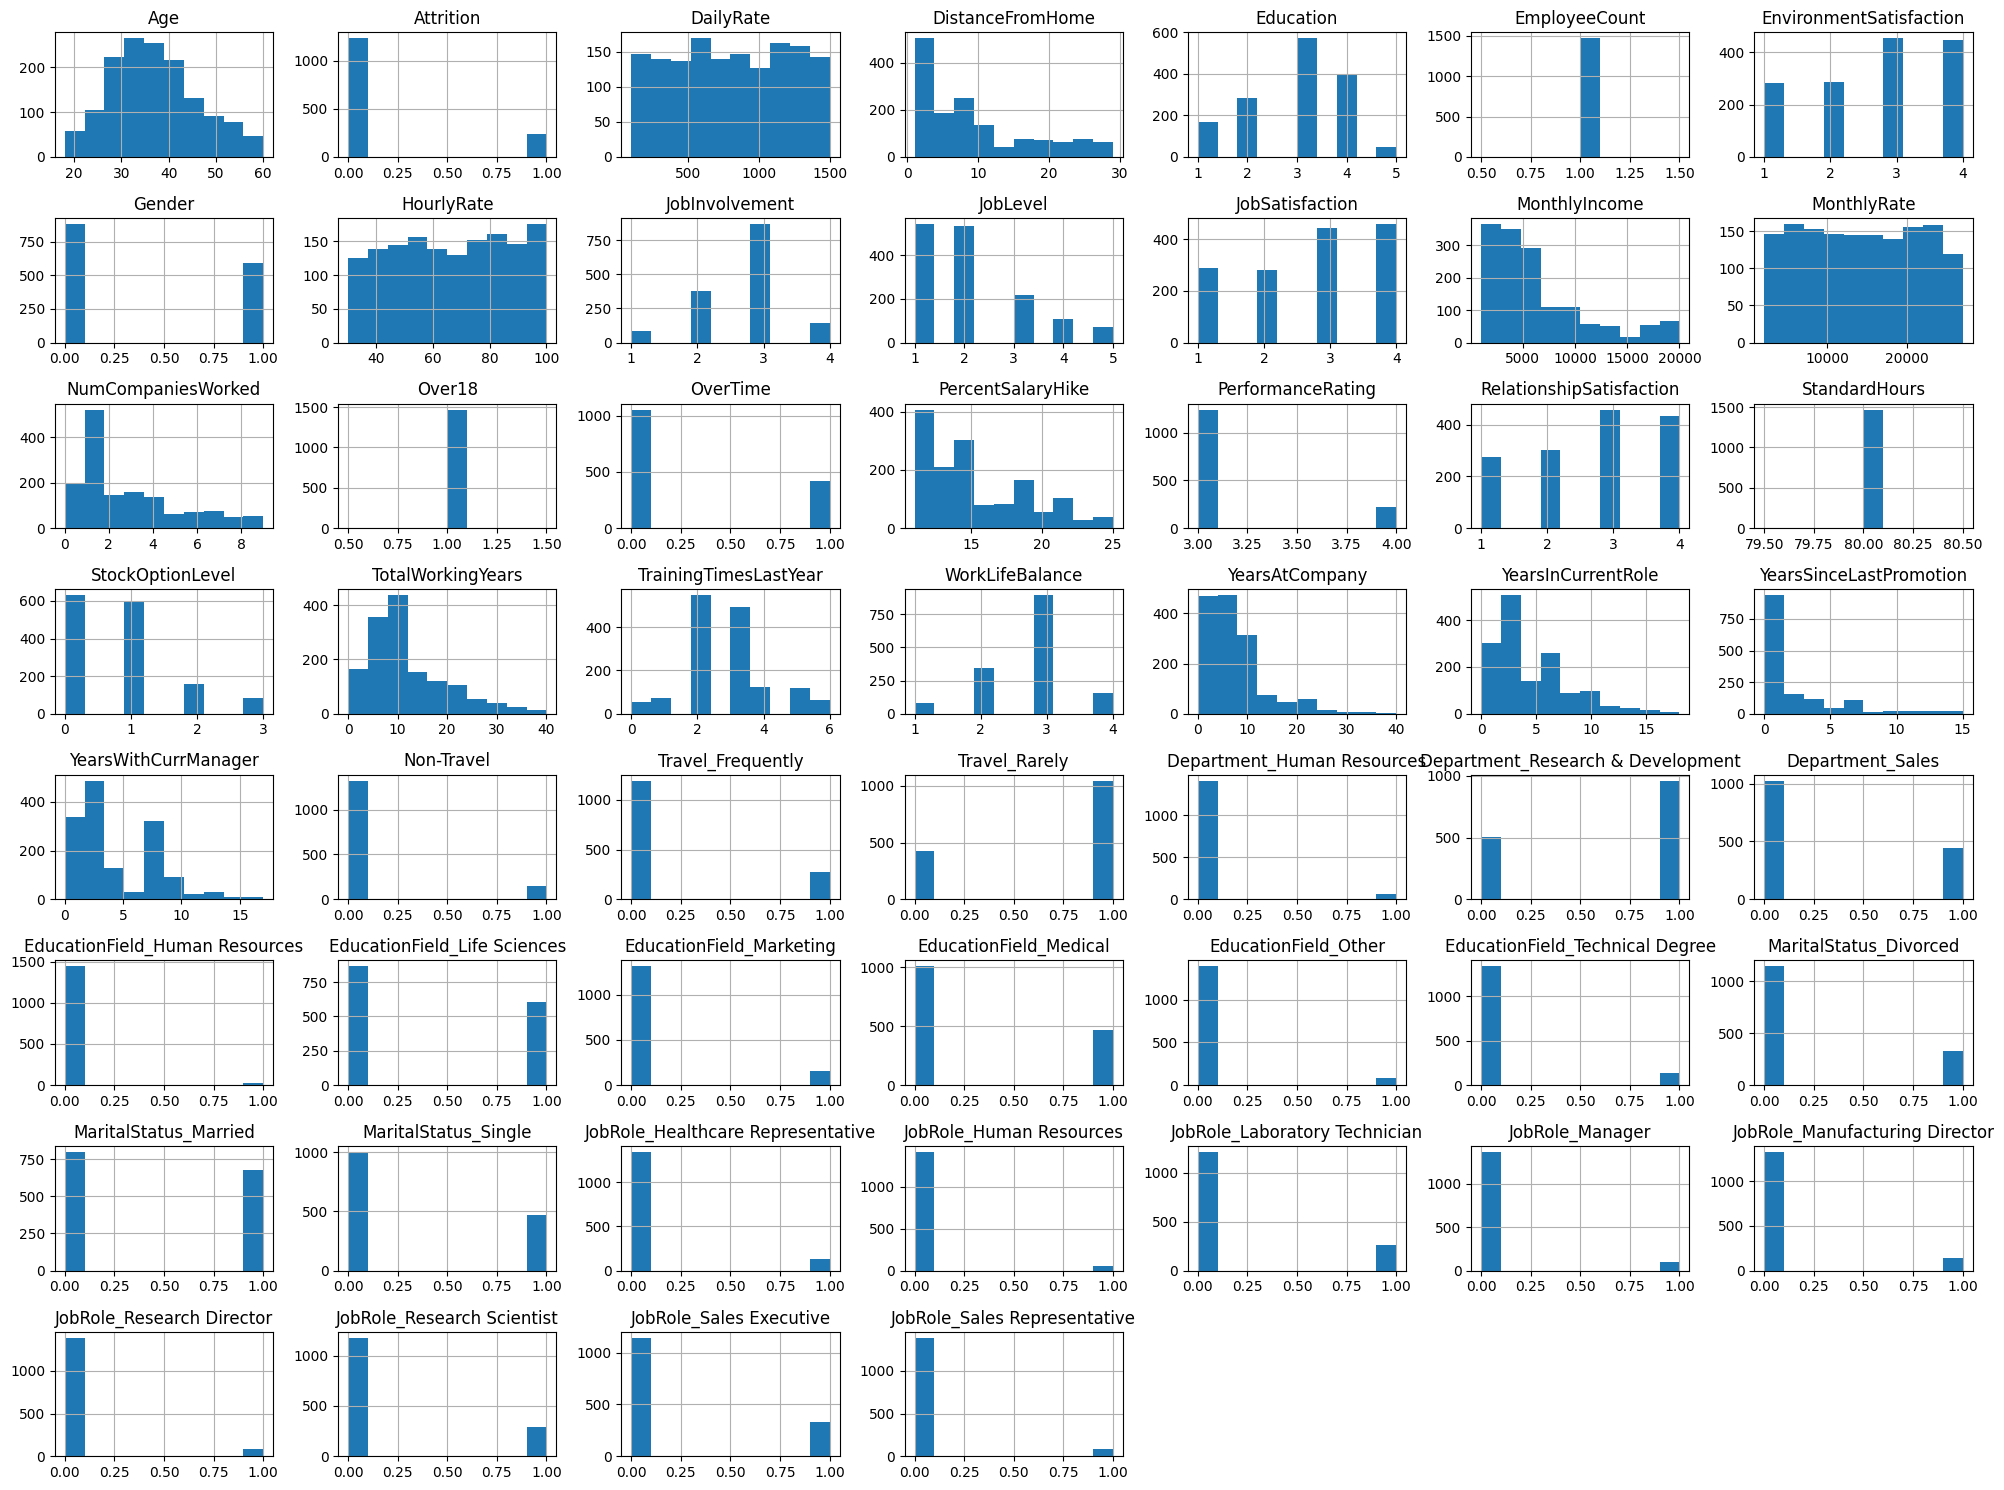

In [24]:
#Visual to catch more un needed data
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [25]:
#Drop more unneeded data
df = df.drop(['EmployeeCount','Over18', 'StandardHours'] , axis=1)

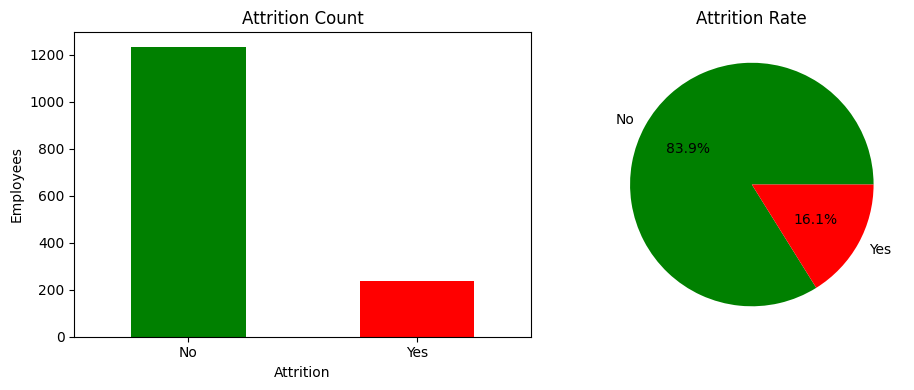

In [26]:
#More visuals for more clearation
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
attrition_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Attrition Count')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.ylabel('Employees')

plt.subplot(1,2,2)
plt.pie(attrition_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Attrition Rate')
plt.tight_layout()
plt.show()

In [27]:
# Train-Test Split
X, y = df.drop('Attrition', axis=1), df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Train Random Forest Model
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [33]:
#Evaluate Model
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"[RESULT] Testing Accuracy: {test_acc:.2f}")

[RESULT] Testing Accuracy: 0.88


The Most Important Feature is : MonthlyIncome


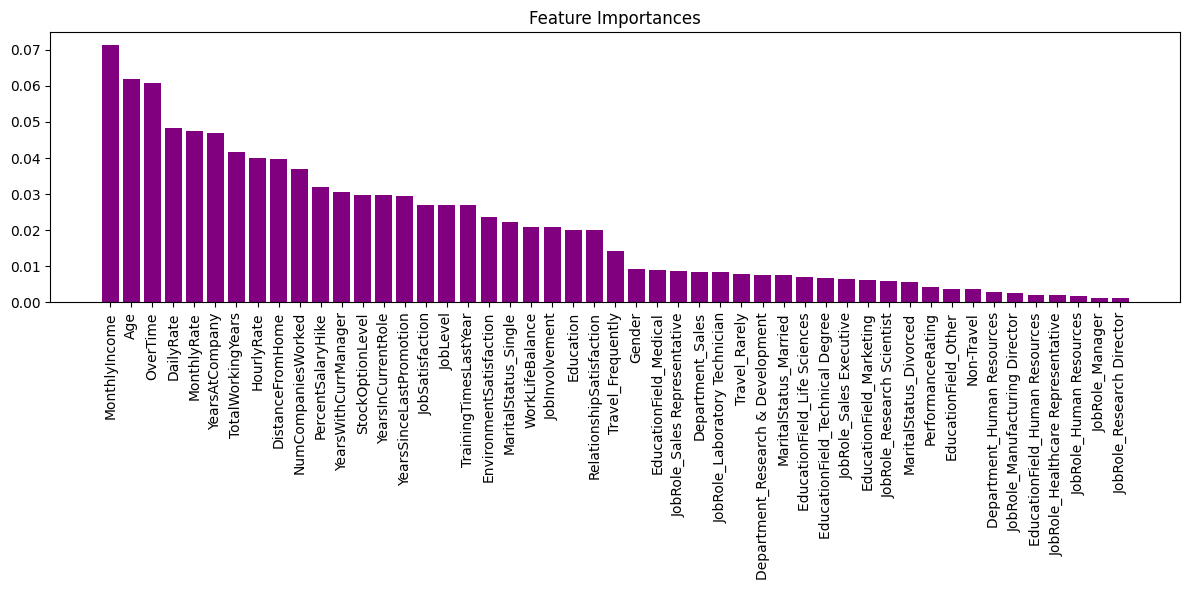

In [34]:
#Feature Importance Checking
importances = model.feature_importances_
Scores = dict(sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True))
top_feature = max(Scores, key=Scores.get)
print(f"The Most Important Feature is : {top_feature}")

plt.figure(figsize=(12,6))
plt.bar(Scores.keys(), Scores.values(), color='purple')
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

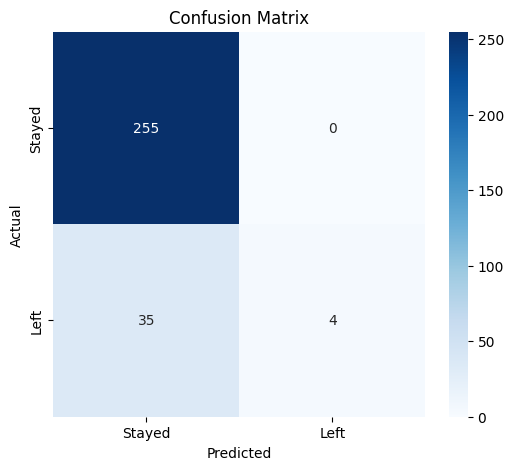

In [35]:
#Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [36]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



# =====================================================
# User Test Function for Prediction If you guys need it
# =====================================================

In [38]:
def test_employee_input(model, feature_list):
    """
    Allows user to input employee data manually and predict attrition.
    """
    print("\n💡 Let's test an employee profile!")
    data = {}
    for feature in feature_list:
        val = input(f"Enter value for {feature}: ")
        try:
            val = float(val)
        except ValueError:
            val = int(val) if val.isdigit() else 0
        data[feature] = val

    df_input = pd.DataFrame([data])
    df_input = df_input.reindex(columns=feature_list, fill_value=0)
    prob = model.predict_proba(df_input)[0][1]
    pred = model.predict(df_input)[0]

    print(f"\nPrediction: {'Will Leave' if pred == 1 else 'Will Stay'}")
    print(f"Probability of Leaving: {prob:.2%}")
    print("Risk Level:", "⚠️ HIGH" if prob > 0.7 else "⚠️ MEDIUM" if prob > 0.4 else "✅ LOW")

# To run test prediction:
run_test = input("\nDo you want to test the model with custom employee data? (yes/no): ").strip().lower()
if run_test == 'yes':
    test_employee_input(model, list(X.columns))0


Do you want to test the model with custom employee data? (yes/no): yes

💡 Let's test an employee profile!
Enter value for Age: 62
Enter value for DailyRate: 500
Enter value for DistanceFromHome: 50
Enter value for Education: Human Resources
Enter value for EnvironmentSatisfaction: 0
Enter value for Gender: Male
Enter value for HourlyRate: 9
Enter value for JobInvolvement: Good
Enter value for JobLevel: Maneger
Enter value for JobSatisfaction: 4
Enter value for MonthlyIncome: 200
Enter value for MonthlyRate: 1
Enter value for NumCompaniesWorked: 4
Enter value for OverTime: 5
Enter value for PercentSalaryHike: 45
Enter value for PerformanceRating: 70
Enter value for RelationshipSatisfaction: 4
Enter value for StockOptionLevel: 0
Enter value for TotalWorkingYears: 10
Enter value for TrainingTimesLastYear: 2
Enter value for WorkLifeBalance: 5
Enter value for YearsAtCompany: 7
Enter value for YearsInCurrentRole: 7
Enter value for YearsSinceLastPromotion: 7
Enter value for YearsWithCurrMana